In [ ]:
import pandas as pd

In [ ]:
df1= pd.read_csv('annotations_s.csv')
df2= pd.read_csv('annotations_a.csv')

In [ ]:
df1.describe()

,ID,Page,State
count,15631,15631,15631
unique,50,1088,4
top,mdp.39015006801313,00000002.txt,Core
freq,1103,50,14439


In [ ]:
df2.describe()

,ID,Page,State
count,15628,15628,15628
unique,50,1098,5
top,mdp.39015006801313,00000001.txt,Core
freq,1098,50,14063


In [ ]:
ID_list_1= df1['ID'].value_counts().to_dict()
ID_list_2= df2['ID'].value_counts().to_dict()

In [ ]:
for key, value in ID_list_1.items():
    if ID_list_1[key]== ID_list_2[key]:
        continue
    else:
        print(key, value)
        print(key, ID_list_2[key])


mdp.39015006801313 1103
mdp.39015006801313 1098
mdp.39015002758699 267
mdp.39015002758699 268
mdp.39015018916802 247
mdp.39015018916802 248


In [ ]:
b1= df1[df1["ID"]=="mdp.39015006801313"]
b2= df2[df2["ID"]=="mdp.39015006801313"]

In [ ]:
p1=b1['Page'].value_counts().to_dict()
p2=b2['Page'].value_counts().to_dict()

In [ ]:

# Find all unique keys in both dictionaries
all_keys = set(p1.keys()).union(set(p2.keys()))

# Check for differences
for key in all_keys:
    if key not in p1:
        print(f"Key '{key}' is in p2 but not in p1. Value in p2: {p2[key]}")
    elif key not in p2:
        print(f"Key '{key}' is in p1 but not in p2. Value in p1: {p1[key]}")
    else:
        if p1[key] != p2[key]:
            print(f"Key '{key}' has different values. Value in p1: {p1[key]}, Value in p2: {p2[key]}")


Key '00001075.txt' has different values. Value in p1: 2, Value in p2: 1
Key '00000917.txt' has different values. Value in p1: 2, Value in p2: 1
Key '00001011.txt' is in p2 but not in p1. Value in p2: 1
Key '00001012.txt' is in p2 but not in p1. Value in p2: 1
Key '00000945.txt' has different values. Value in p1: 2, Value in p2: 1
Key '00000966.txt' has different values. Value in p1: 2, Value in p2: 1
Key '00001010.txt' is in p2 but not in p1. Value in p2: 1
Key '00001028.txt' has different values. Value in p1: 2, Value in p2: 1
Key '00001025.txt' has different values. Value in p1: 2, Value in p2: 1
Key '00001060.txt' has different values. Value in p1: 2, Value in p2: 1
Key '00001057.txt' has different values. Value in p1: 2, Value in p2: 1
Key '00000952.txt' is in p2 but not in p1. Value in p2: 1
Key '00001009.txt' is in p2 but not in p1. Value in p2: 1
Key '00000951.txt' is in p2 but not in p1. Value in p2: 1
Key '00000923.txt' has different values. Value in p1: 2, Value in p2: 1
Key 

In [ ]:
difference= d[d !=0]
display(difference)

,count
ID,
mdp.39015002758699,-1
mdp.39015006801313,5
mdp.39015018916802,-1


In [ ]:
faulty_id = ['mdp.39015002758699', 'mdp.39015006801313','mdp.39015018916802', 'msu.31293001706088']
df1= df1[df1['ID'].isin(faulty_id)==False]
df1.describe()

,ID,Page,State
count,13618,13618,13618
unique,46,610,4
top,uc2.ark+=13960=t29882z7p,00000001.txt,Core
freq,610,46,12548


In [ ]:
df2= df2[df2['ID'].isin(faulty_id)==False]
df2.describe()

,ID,Page,State
count,13618,13618,13618
unique,46,610,5
top,uc2.ark+=13960=t29882z7p,00000001.txt,Core
freq,610,46,12329


In [ ]:
merged_df = pd.merge(df1, df2, on=['ID','Page'] ,suffixes=('_df1', '_df2'))

In [ ]:
display(merged_df)

,ID,Page,State_df1,State_df2
0,mdp.39015066052906,00000001.txt,Front,Front
1,mdp.39015066052906,00000002.txt,Front,Front
2,mdp.39015066052906,00000003.txt,Front,Front
3,mdp.39015066052906,00000004.txt,Front,Front
4,mdp.39015066052906,00000005.txt,Front,Front
...,...,...,...,...
13613,uc1.$b703964,00000292.txt,Back,Back
13614,uc1.$b703964,00000293.txt,Back,Back
13615,uc1.$b703964,00000294.txt,Back,Back
13616,uc1.$b703964,00000295.txt,Back,Back


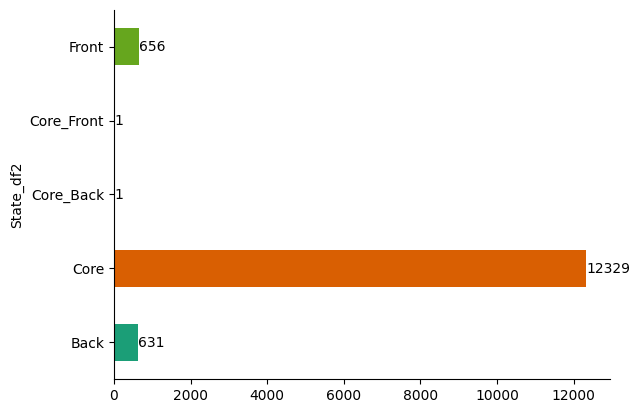

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

counts = merged_df.groupby('State_df2').size()


ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
ax.spines[['top', 'right']].set_visible(False)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')


plt.show()


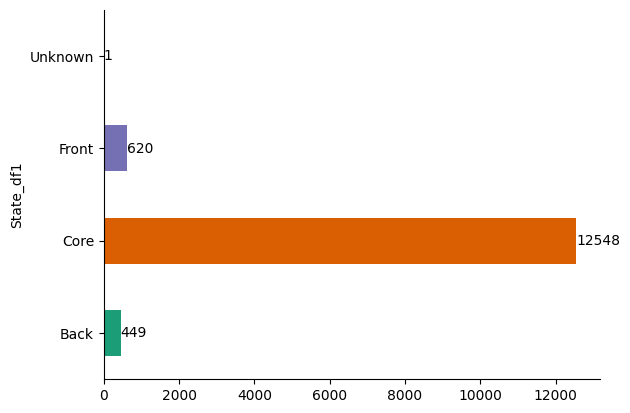

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

counts = merged_df.groupby('State_df1').size()
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
ax.spines[['top', 'right']].set_visible(False)


for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

In [ ]:
merged_df['State_df1'].replace({'Front': 1, 'Core': 2, 'Back':3 , 'Unknown':2}, inplace=True)
merged_df['State_df2'].replace({'Front': 1, 'Core': 2, 'Back':3 ,'Unknown':4, 'Core_Front':2 ,'Core_Back':2 }, inplace=True)

In [ ]:
merged_df.head()

,ID,Page,State_df1,State_df2
0,mdp.39015066052906,00000001.txt,1,1
1,mdp.39015066052906,00000002.txt,1,1
2,mdp.39015066052906,00000003.txt,1,1
3,mdp.39015066052906,00000004.txt,1,1
4,mdp.39015066052906,00000005.txt,1,1


In [ ]:
merged_df['State_df1'].value_counts()

,count
State_df1,
2,12549
1,620
3,449


In [ ]:
merged_df['State_df2'].value_counts()

,count
State_df2,
2,12331
1,656
3,631


In [ ]:
merged_df['State_diff']= merged_df['State_df1']-merged_df['State_df2']

In [ ]:
merged_df['State_diff'].value_counts()

,count
State_diff,
0,13242
-1,261
1,115


In [ ]:
merged_df['State_diff'].replace({-1:1} , inplace=True)

In [ ]:
merged_df['State_diff'].value_counts()

,count
State_diff,
0,13242
1,376


In [ ]:
state_diff_sum = merged_df.groupby('ID')['State_diff'].sum().sort_values(ascending=False).to_dict()
display(state_diff_sum)

{'coo.31924013010594': 50,
 'mdp.39015018888910': 44,
 'mdp.39015012456565': 34,
 'wu.89062346192': 32,
 'mdp.39015019124075': 32,
 'uc1.32106005854044': 27,
 'wu.89062292206': 21,
 'uc1.b4655689': 19,
 'mdp.39015026429558': 19,
 'wu.89069257962': 13,
 'mdp.39015001575367': 11,
 'mdp.39015065600481': 11,
 'uc1.$b453271': 8,
 'coo.31924105253953': 7,
 'uc1.$b730193': 6,
 'mdp.39015008530829': 5,
 'uc1.c2947484': 5,
 'mdp.35112100069899': 3,
 'mdp.39015075340128': 3,
 'uc1.$b56473': 3,
 'mdp.39015009354625': 2,
 'uc2.ark+=13960=t29882z7p': 2,
 'uc1.$b703964': 2,
 'uc1.b3435562': 2,
 'uc1.$b285041': 2,
 'mdp.39015063918554': 2,
 'mdp.39015004151679': 2,
 'uc2.ark+=13960=t7cr5p059': 1,
 'uc1.b3796918': 1,
 'wu.89042494500': 1,
 'wu.89049799737': 1,
 'inu.30000041692793': 1,
 'uc2.ark+=13960=t8tb1209f': 1,
 'uc1.$b799073': 1,
 'uc1.b3725672': 1,
 'uc1.$b404059': 1,
 'uc1.b2806638': 0,
 'uc1.b4951365': 0,
 'uc1.32106000740495': 0,
 'uc1.$b70833': 0,
 'uc1.$b299111': 0,
 'mdp.39015066052906':

In [ ]:
ids= []
for key, value in state_diff_sum.items():
    if value<6 and value!=0:
        ids.append(key)

In [ ]:
new_df=  merged_df[merged_df['ID'].isin(ids)]
new_df = new_df[new_df['State_diff'] != 0]
new_df.drop("State_diff" ,axis=1)

,ID,Page,State_df1,State_df2
832,mdp.39015009354625,00000481.txt,2,3
844,mdp.39015009354625,00000493.txt,3,2
1554,uc2.ark+=13960=t7cr5p059,00000007.txt,1,2
2569,uc1.c2947484,00000008.txt,2,1
2576,uc1.c2947484,00000015.txt,1,2
2653,uc1.c2947484,00000092.txt,3,2
2657,uc1.c2947484,00000096.txt,3,2
2662,uc1.c2947484,00000101.txt,3,2
2980,uc1.$b56473,00000315.txt,3,2
2981,uc1.$b56473,00000316.txt,3,2


In [ ]:
new_df['State_df1'].replace({'Front':1, 'Core':0, 'Back' :3} , inplace=True)
new_df['State_df2'].replace({'Front':1, 'Core':0, 'Back' :3} , inplace=True)
# new_df.drop("State_diff" ,axis=1)
new_df["Error_type"]= new_df["State_df1"]-new_df["State_df2"]



In [ ]:
new_df["Error_type"].replace({-3:3 , -1:1} , inplace=True)
new_df["Error_type"].value_counts()

,count
Error_type,
1,26
3,16


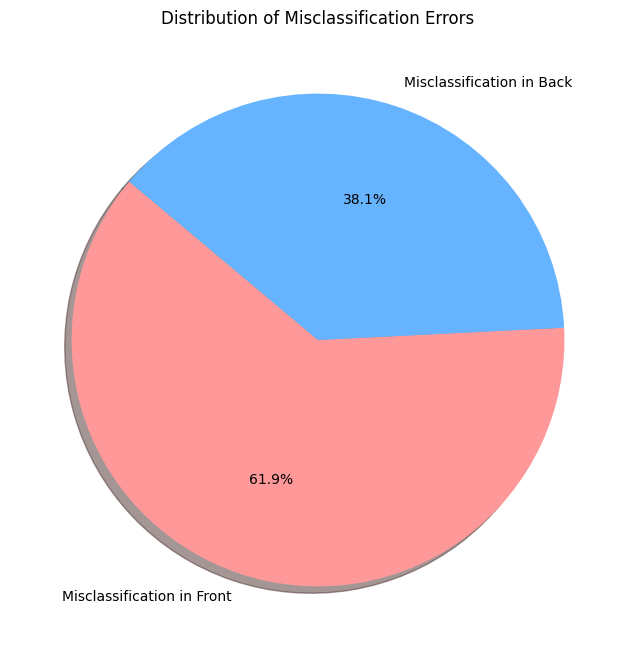

In [ ]:
import matplotlib.pyplot as plt

# Define the data
error_types = ['Misclassification in Front', 'Misclassification in Back']
error_counts = [26, 16]

# Define colors for the pie chart
colors = ['#ff9999','#66b3ff']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(error_counts, labels=error_types, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)

# Add a title
plt.title('Distribution of Misclassification Errors')

# Show the pie chart
plt.show()


In [ ]:
state_counts_df1 = df['State_df1'].value_counts()
display(state_counts_df1)

,count
State_df1,
3,15
1,14
2,13


In [ ]:
state_counts_df2 = df['State_df2'].value_counts()
display(state_counts_df2)

,count
State_df2,
2,29
1,12
3,1


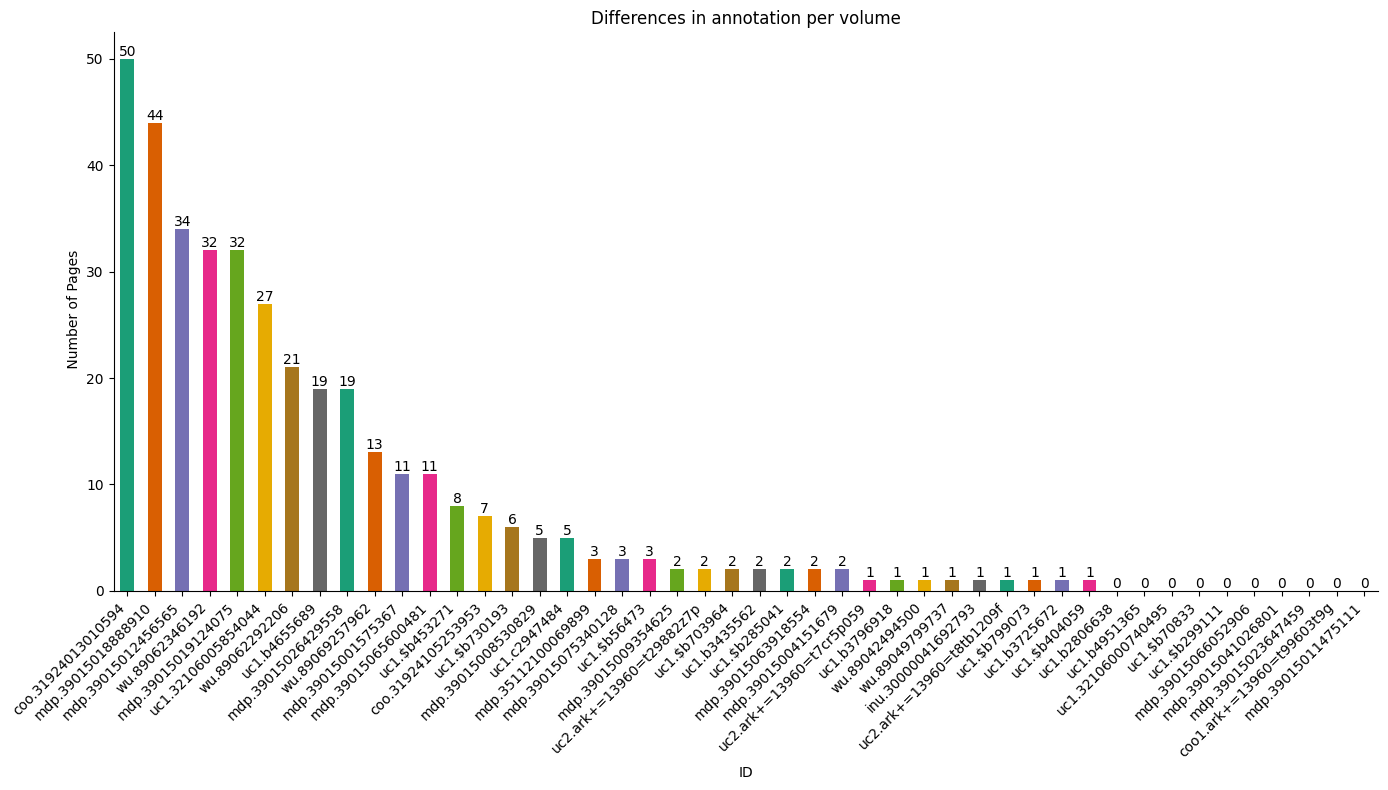

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


state_diff_sum = merged_df.groupby('ID')['State_diff'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))

ax = state_diff_sum.plot(kind='bar', color=sns.color_palette('Dark2'))

ax.spines[['top', 'right']].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation=45, ha='right')

plt.xlabel('ID')
plt.ylabel(' Number of Pages')
plt.title('Differences in annotation per volume')

plt.tight_layout()

plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(merged_df['State_df1'], merged_df['State_df2'])
print("Kappa score:", kappa)

Kappa score: 0.829424355905021


In [ ]:
ids= ['mdp.39015002758699', 'mdp.39015006801313','mdp.39015018916802']

In [ ]:
faulty_df_s= df1[df1['ID'].isin(ids)]
display(faulty_df_s)

,ID,Page,State
4054,mdp.39015006801313,00000001.txt,Front
4055,mdp.39015006801313,00000002.txt,Front
4056,mdp.39015006801313,00000003.txt,Front
4057,mdp.39015006801313,00000004.txt,Front
4058,mdp.39015006801313,00000005.txt,Front
...,...,...,...
10896,mdp.39015002758699,00000265.txt,Back
10897,mdp.39015002758699,00000266.txt,Back
10898,mdp.39015002758699,00000267.txt,Back
10899,mdp.39015002758699,00000268.txt,Back


In [ ]:
faulty_df_s['ID'].value_counts()

,count
ID,
mdp.39015006801313,1103
mdp.39015002758699,267
mdp.39015018916802,247


In [ ]:
faulty_df_a= df2[df2['ID'].isin(ids)]

faulty_df_a['ID'].value_counts()

,count
ID,
mdp.39015006801313,1098
mdp.39015002758699,268
mdp.39015018916802,248


In [ ]:
ids= ['mdp.39015002758699', 'mdp.39015006801313','mdp.39015018916802']

l=[]
for id in ids:
  ds= faulty_df_s[faulty_df_s['ID'] ==id ]
  da= faulty_df_a[faulty_df_a['ID'] ==id ]
  s= ds["Page"].to_list()
  a= da["Page"].to_list()
  d={}
  d['ID']= id
  d['missing in a']= list(set(s)-set(a))
  d['missing in s']= list(set(a)-set(s))
  print(d)
  l.append(d)


{'ID': 'mdp.39015002758699', 'missing in a': [], 'missing in s': ['00000014.txt']}
{'ID': 'mdp.39015006801313', 'missing in a': [], 'missing in s': ['00000952.txt', '00000951.txt', '00001042.txt', '00001011.txt', '00001046.txt', '00000939.txt', '00000953.txt', '00001012.txt', '00001009.txt', '00001010.txt']}
{'ID': 'mdp.39015018916802', 'missing in a': [], 'missing in s': ['00000244.txt']}


In [ ]:
l

[{'ID': 'mdp.39015002758699',
  'missing in a': [],
  'missing in s': ['00000014.txt']},
 {'ID': 'mdp.39015006801313',
  'missing in a': [],
  'missing in s': ['00000952.txt',
   '00000951.txt',
   '00001042.txt',
   '00001011.txt',
   '00001046.txt',
   '00000939.txt',
   '00000953.txt',
   '00001012.txt',
   '00001009.txt',
   '00001010.txt']},
 {'ID': 'mdp.39015018916802',
  'missing in a': [],
  'missing in s': ['00000244.txt']}]

In [ ]:
  n= faulty_df_s[faulty_df_s['ID'] =='mdp.39015006801313' ]
  p = n["Page"].value_counts().unique()
  print(p)

[2 1]


In [ ]:
n= faulty_df_a[faulty_df_a['ID'] =='mdp.39015006801313' ]
p = n["Page"].value_counts().unique()
print(p)

[1]


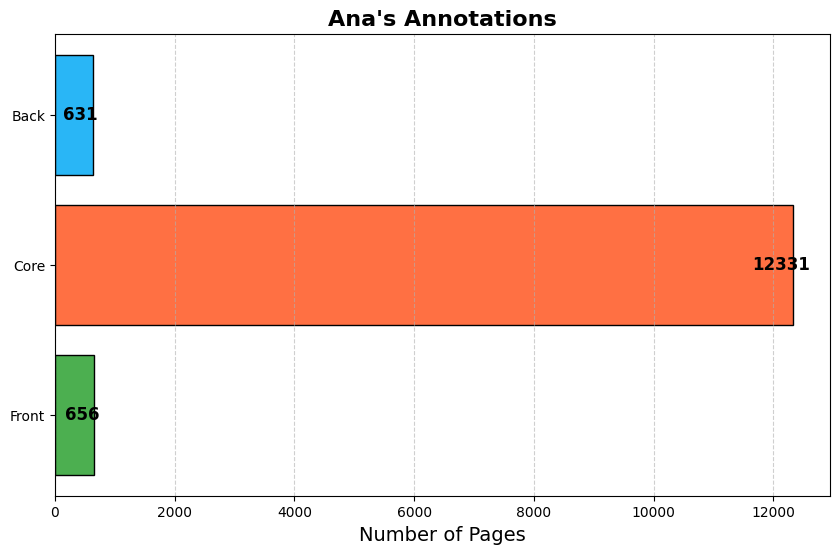

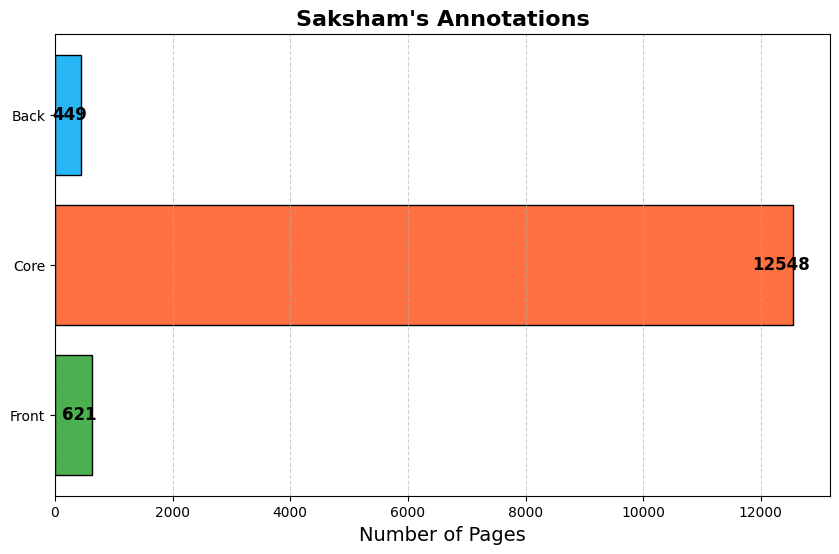

In [ ]:
import matplotlib.pyplot as plt

# Data for the first graph
data_1 = {'Front': 656, 'Core': 12331, 'Back': 631}
colors = ['#4CAF50', '#FF7043', '#29B6F6']  # Green, Orange, Blue colors

# Data for the second graph
data_2 = {'Front': 621, 'Core': 12548, 'Back': 449}

# Function to create bar charts with labels inside the bars
def create_bar_chart(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(list(data.keys()), list(data.values()), color=colors, edgecolor='black')

    # Adding data labels inside the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width - 200, bar.get_y() + bar.get_height()/2,
                 f'{width}', ha='center', va='center', color='Black', fontsize=12, fontweight='bold')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.show()

# Create the first plot
create_bar_chart(data_1, "Ana's Annotations", 'Number of Pages', '')

# Create the second plot
create_bar_chart(data_2, "Saksham's Annotations", 'Number of Pages', '')
